In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [15]:
f = lambda x:x**2-15*x+1
df_dx = lambda x:2*x-15
d2f_dx2 = lambda x:2

def GD(alpha,max_itr,f,df_dx,epsilon,initial_guess):
  x=initial_guess
  for i in range(max_itr):
    grad = df_dx(x)
    if(np.abs(grad)<epsilon):
      max_itr = i
      break
    x = x - alpha*grad
  return x,grad,max_itr



def newtons_method_optimizer(alpha,f, df_dx, d2f_dx2, initial_guess, epsilon=1e-6, max_iterations=1000):
    x = initial_guess
    for i in range(max_iterations):
        grad = df_dx(x)
        x = x - alpha*((1 / d2f_dx2(x)) * grad)
        if np.abs(grad) < epsilon:
            return x, grad, i
    return x, grad, max_itr


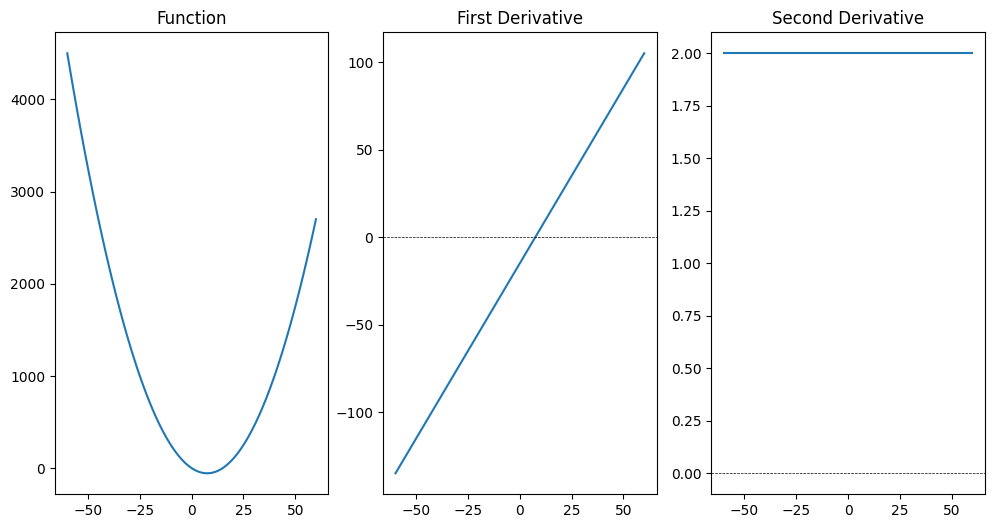

In [16]:
x_vals = np.linspace(-60, 60, 120)
y_vals = f(x_vals)

plt.figure(figsize=(12, 6))

# Plotting the function
plt.subplot(1, 3, 1)
plt.plot(x_vals, y_vals, label='f(x)')
plt.title('Function')


plt.subplot(1, 3, 2)
plt.plot(x_vals, df_dx(x_vals), label="f'(x)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('First Derivative')

y = [d2f_dx2(x) for x in x_vals]
plt.subplot(1, 3, 3)
plt.plot(x_vals, y, label="f''(x)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('Second Derivative')

plt.show()

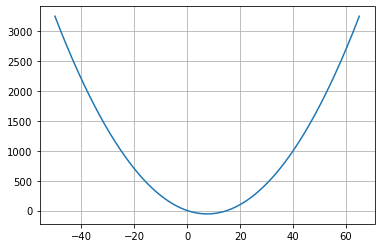

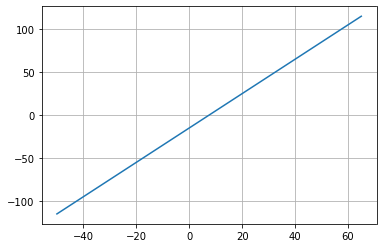

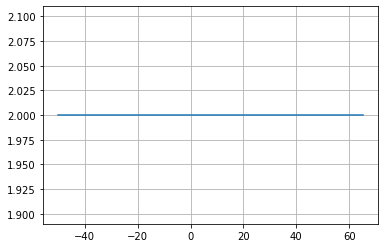

In [17]:
x,grad,max_itr = GD(0.01,500,f,df_dx,0.1,40)
print(max_itr)
print(grad)
print(x)


321
0.09919360038422198
7.549596800192111


In [ ]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [ ]:
x,grad,max_itr = newtons_method_optimizer(1,f, df_dx, d2f_dx2, 40,0.1, 1000)
print(max_itr)
print(grad)
print(x)

1
0.0
7.5


In [ ]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [ ]:
x,grad,max_itr = newtons_method_optimizer(0.8,f, df_dx, d2f_dx2, 40,0.1, 1000)
print(max_itr)
print(grad)
print(x)

5
0.020799999999999486
7.50208


In [ ]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [ ]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

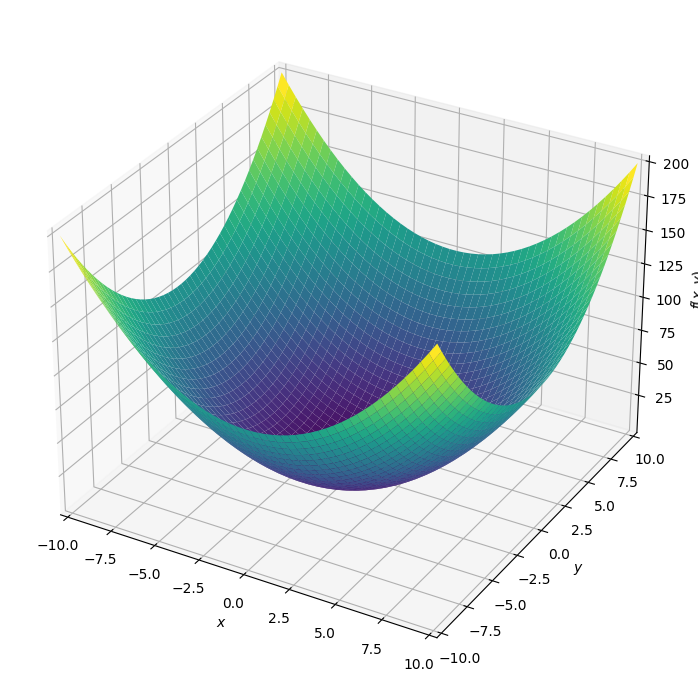

In [ ]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

In [18]:
import numpy as np

f = lambda x: x[0]**2 + x[1]**2
df_dx = lambda x: np.array([[2*x[0]], [2*x[1]]])
d2f_dx2 = lambda x: np.array([[2, 0], [0, 2]])

def GD(alpha, max_itr, f, df_dx, epsilon, initial_guess):

    x = initial_guess.reshape(-1, 1)

    for i in range(max_itr):

        grad = df_dx(x).reshape(-1,1)

        norm_grad = np.linalg.norm(grad)

        if norm_grad < epsilon:
            return x, grad, i
        x = x - alpha * grad

    return x, grad, max_itr

result = GD(0.1, 500, f, df_dx, 0.001, np.array([10, 10]))
print(result)


(array([[0.00034845],
       [0.00034845]]), array([[0.0006969],
       [0.0006969]]), 46)


In [ ]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min =
 [[0.00034845]
 [0.00034845]]
Gradient =
 [[0.0006969]
 [0.0006969]]


In [ ]:
result = GD(0.5, 500, f, df_dx, 0.001, np.array([10, 10]))
print(result)

(array([[0.],
       [0.]]), array([[0.],
       [0.]]), 1)


In [ ]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [19]:
def newtons_method_optimizer(alpha,f, df_dx, d2f_dx2, initial_guess, epsilon=1e-6, max_iterations=1000):
    x = initial_guess.reshape(-1,1)
    for i in range(max_iterations):
        grad = df_dx(x).reshape(-1,1)
        hessian_inv = np.linalg.inv(d2f_dx2(x).astype('float64'))
        x = x - alpha * hessian_inv.dot(grad)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < epsilon:
            return x, grad, i
    return x, grad, max_iterations

In [ ]:
result = newtons_method_optimizer(1,f, df_dx, d2f_dx2, np.array([[10],[10]]), epsilon=0.001, max_iterations=1000)
print(result)

(array([[0.],
       [0.]]), array([[0.],
       [0.]]), 1)


In [ ]:
# First function
# Multi-variable Newton's method without learning rate,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [ ]:
result = newtons_method_optimizer(0.5,f, df_dx, d2f_dx2, np.array([[10],[10]]), epsilon=0.001, max_iterations=1000)
print(result)

(array([[0.00015259],
       [0.00015259]]), array([[0.00061035],
       [0.00061035]]), 15)


In [ ]:
# First function
# Multi-variable Newton's method with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001

Found solution after 15 iterations.
xy_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]


$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

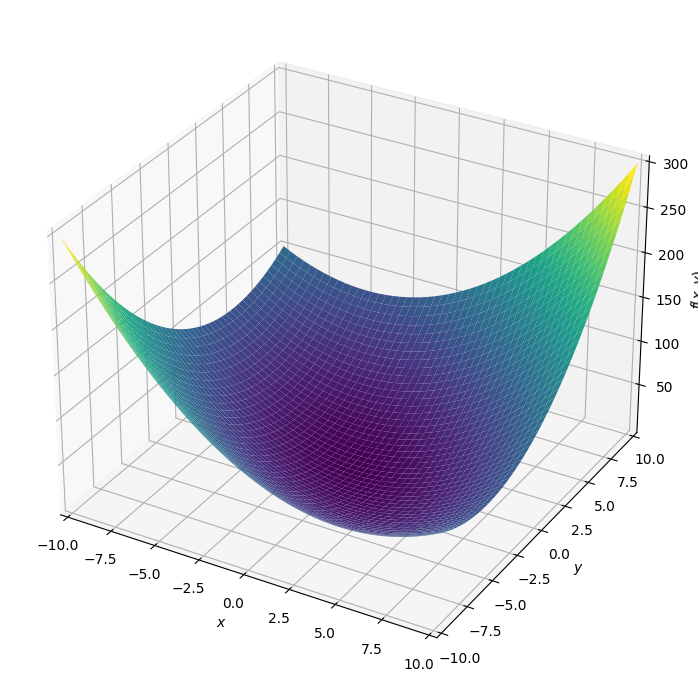

In [ ]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

f(x)=x2+xy+y2

In [ ]:
f = lambda x: x[0]**2 + x[0]*x[1]+x[1]**2
df_dx = lambda x: np.array([[2*x[0]+x[1]], [2*x[1]+x[0]]])
d2f_dx2 = lambda x: np.array([[2,1], [1, 2]])

In [ ]:
result = GD(0.5, 500, f, df_dx, 0.001, np.array([10, 10]))
print(result)

(array([[0.00015259],
       [0.00015259]]), array([[0.00045776],
       [0.00045776]]), 16)


In [ ]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]


In [ ]:
result = newtons_method_optimizer(1,f, df_dx, d2f_dx2, np.array([[10],[10]]), epsilon=0.001, max_iterations=1000)
print(result)

(array([[0.],
       [0.]]), array([[3.55271368e-15],
       [1.77635684e-15]]), 1)


In [ ]:
# Second function
# Multi-variable Newton's method without learning rate,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [ ]:
result = newtons_method_optimizer(0.9,f, df_dx, d2f_dx2, np.array([[10],[10]]), 0.001, 1000)
print(result)

(array([[1.e-05],
       [1.e-05]]), array([[0.0003],
       [0.0003]]), 5)


In [ ]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9,
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min =
 [[0.0001]
 [0.0001]]
Gradient =
 [[0.0003]
 [0.0003]]


$𝒇(𝒙)=𝒙^𝟐y$

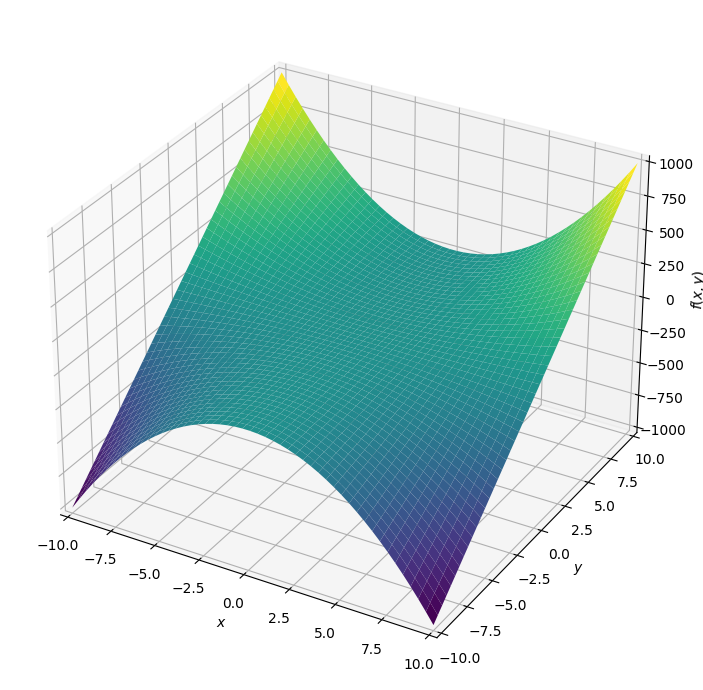

In [ ]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [20]:
f = lambda x: x[0]**2 * x[1]
df_dx = lambda x: np.array([[2 * x[0] * x[1], x[0]**2]])
d2f_dx2 = lambda x: np.array([[2*x[1], 2*x[0]], [2*x[0], 0]])

In [21]:
result = GD(0.01, 500, f, df_dx, 0.001, np.array([10, 10]))
print(result)

(array([[6.80598421e-05],
       [6.85061189e+00]]), array([[9.32503127e-04],
       [4.63214210e-09]]), 79)


In [ ]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001



Found solution after 79 iterations.
xy_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]


In [ ]:
result = newtons_method_optimizer(1,f, df_dx, d2f_dx2, np.array([[10],[10]]), 0.001, 1000)
print(result)

(array([[ 7.62939453e-05],
       [-2.77928449e+00]]), array([[-8.48235032e-04],
       [ 2.32830644e-08]]), 16)


<ipython-input-67-4d60995bfecd>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  d2f_dx2 = lambda x: np.array([[2*x[1], 2], [2*x[0], 0]])


In [ ]:
# Third function
# Multi-variable Newton's method without learning rate,
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min =
 [[0.01953125]
 [0.01953125]]
Gradient =
 [[0.00076294]
 [0.00038147]]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [2]:
import numpy as np

In [1]:
f = lambda x:x[0]**2+x[1]**2
df_dx = lambda x : np.array([[2*x[0],2*x[1]]])
d2f_df2 = lambda x: np.array([[2,0],[0,2]])

In [5]:
def PFGS(alpha,epsilon,xk_1,xk,max_itr):
  B_inv = np.eye(len(xk))
  I = np.eye(len(xk))
  for i in range(max_itr):
    print('xn:' + str(xk.reshape(-1,1)))
    print('xn-1:' + str(xk_1.reshape(-1,1)))

    delta_x = (xk-xk_1)

    print('drivative xn:' + str(df_dx(xk).reshape(-1,1)))
    print('drivative xn-1:' + str(df_dx(xk_1).reshape(-1,1)))

    delta_drivative = (df_dx(xk) - df_dx(xk_1)).reshape(-1,1)
    grad = df_dx(xk).reshape(-1,1)
    norm_grad = np.linalg.norm(grad)

    print('norm of gradient:' + str(norm_grad))

    if norm_grad<epsilon:
      print('*********************')
      print('after'+str(i+1)+'iterations')
      print('x_min'+str(xk))
      print('grad'+str(grad))
      return xk,grad,i

    first_term = I - (np.dot(delta_x,delta_drivative.T)/np.dot(delta_drivative.T,delta_x))
    second_term = I - (np.dot(delta_drivative,delta_x.T)/(np.dot(delta_drivative.T,delta_x)))
    third_term = np.dot(delta_x,delta_x.T)/np.dot(delta_drivative.T,delta_x)

    B_inv = (first_term@B_inv@second_term)  + third_term
    print('B_inv' + str(B_inv))
    print('**************************************************************')
    xk_1=xk
    xk = xk - alpha * (B_inv @ grad)
  print('*********************')
  print('after'+str(max_itr+1)+'iterations')
  print('x_min'+str(xk))
  print('grad'+str(grad))
  return xk,grad,max_itr




In [6]:
xk_1 = np.array([[10],[10]])
xk = np.array([[9],[9]])
x_min,gradient,max_itr = PFGS(1,0.001,xk_1,xk,500)

xn:[[9]
 [9]]
xn-1:[[10]
 [10]]
drivative xn:[[18]
 [18]]
drivative xn-1:[[20]
 [20]]
norm of gradient:25.45584412271571
B_inv[[ 0.75 -0.25]
 [-0.25  0.75]]
**************************************************************
xn:[[0.]
 [0.]]
xn-1:[[9]
 [9]]
drivative xn:[[0.]
 [0.]]
drivative xn-1:[[18]
 [18]]
norm of gradient:0.0
*********************
after2iterations
x_min[[0.]
 [0.]]
grad[[0.]
 [0.]]


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [7]:
xk_1 = np.array([[10],[10]])
xk = np.array([[9],[9]])
x_min,gradient,max_itr = PFGS(0.9,0.001,xk_1,xk,500)

xn:[[9]
 [9]]
xn-1:[[10]
 [10]]
drivative xn:[[18]
 [18]]
drivative xn-1:[[20]
 [20]]
norm of gradient:25.45584412271571
B_inv[[ 0.75 -0.25]
 [-0.25  0.75]]
**************************************************************
xn:[[0.9]
 [0.9]]
xn-1:[[9]
 [9]]
drivative xn:[[1.8]
 [1.8]]
drivative xn-1:[[18]
 [18]]
norm of gradient:2.545584412271572
B_inv[[ 0.75 -0.25]
 [-0.25  0.75]]
**************************************************************
xn:[[0.09]
 [0.09]]
xn-1:[[0.9]
 [0.9]]
drivative xn:[[0.18]
 [0.18]]
drivative xn-1:[[1.8]
 [1.8]]
norm of gradient:0.25455844122715704
B_inv[[ 0.75 -0.25]
 [-0.25  0.75]]
**************************************************************
xn:[[0.009]
 [0.009]]
xn-1:[[0.09]
 [0.09]]
drivative xn:[[0.018]
 [0.018]]
drivative xn-1:[[0.18]
 [0.18]]
norm of gradient:0.025455844122715694
B_inv[[ 0.75 -0.25]
 [-0.25  0.75]]
**************************************************************
xn:[[0.0009]
 [0.0009]]
xn-1:[[0.009]
 [0.009]]
drivative xn:[[0.0018]
 [0.

In [ ]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715686

In [10]:
f = lambda x: x[0]**2 + x[0]*x[1]+x[1]**2
df_dx = lambda x: np.array([[2*x[0]+x[1]], [2*x[1]+x[0]]])
d2f_dx2 = lambda x: np.array([[2,1], [1, 2]])
xk_1 = np.array([[10],[10]])
xk = np.array([[9],[9]])
x_min,gradient,max_itr = PFGS(1,0.001,xk_1,xk,500)

xn:[[9]
 [9]]
xn-1:[[10]
 [10]]
drivative xn:[[27]
 [27]]
drivative xn-1:[[30]
 [30]]
norm of gradient:38.18376618407357
B_inv[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
**************************************************************
xn:[[3.55271368e-15]
 [1.77635684e-15]]
xn-1:[[9]
 [9]]
drivative xn:[[8.88178420e-15]
 [7.10542736e-15]]
drivative xn-1:[[27]
 [27]]
norm of gradient:1.1374233532693354e-14
*********************
after2iterations
x_min[[3.55271368e-15]
 [1.77635684e-15]]
grad[[8.88178420e-15]
 [7.10542736e-15]]


In [ ]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [11]:
xk_1 = np.array([[10],[10]])
xk = np.array([[9],[9]])
x_min,gradient,max_itr = PFGS(0.9,0.001,xk_1,xk,500)

xn:[[9]
 [9]]
xn-1:[[10]
 [10]]
drivative xn:[[27]
 [27]]
drivative xn-1:[[30]
 [30]]
norm of gradient:38.18376618407357
B_inv[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
**************************************************************
xn:[[0.9]
 [0.9]]
xn-1:[[9]
 [9]]
drivative xn:[[2.7]
 [2.7]]
drivative xn-1:[[27]
 [27]]
norm of gradient:3.8183766184073655
B_inv[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
**************************************************************
xn:[[0.09]
 [0.09]]
xn-1:[[0.9]
 [0.9]]
drivative xn:[[0.27]
 [0.27]]
drivative xn-1:[[2.7]
 [2.7]]
norm of gradient:0.38183766184073553
B_inv[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
**************************************************************
xn:[[0.009]
 [0.009]]
xn-1:[[0.09]
 [0.09]]
drivative xn:[[0.027]
 [0.027]]
drivative xn-1:[[0.27]
 [0.27]]
norm of gradient:0.03818376618407363
B_inv[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
******************************************

In [ ]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.000

In [13]:
f = lambda x: x[0]**2 * x[1]
df_dx = lambda x: np.array([[2 * x[0] * x[1], x[0]**2]])
d2f_dx2 = lambda x: np.array([[2*x[1], 2*x[0]], [2*x[0], 0]])
xk_1 = np.array([[10],[10]])
xk = np.array([[9],[9]])
x_min,gradient,max_itr = PFGS(1,0.001,xk_1,xk,500)

xn:[[9]
 [9]]
xn-1:[[10]
 [10]]
drivative xn:[[162]
 [ 81]]
drivative xn-1:[[200]
 [100]]
norm of gradient:181.12150617748296
B_inv[[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
**************************************************************
xn:[[4.73684211]
 [4.73684211]]
xn-1:[[9]
 [9]]
drivative xn:[[44.87534626]
 [22.43767313]]
drivative xn-1:[[162]
 [ 81]]
norm of gradient:50.17216237603412
B_inv[[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
**************************************************************
xn:[[3.10344828]
 [3.10344828]]
xn-1:[[4.73684211]
 [4.73684211]]
drivative xn:[[19.2627824]
 [ 9.6313912]]
drivative xn-1:[[44.87534626]
 [22.43767313]]
norm of gradient:21.536445443220423
B_inv[[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
**************************************************************
xn:[[1.875]
 [1.875]]
xn-1:[[3.10344828]
 [3.10344828]]
drivative xn:[[7.03125 ]
 [3.515625]]
drivative xn-1:[[19.2627824]
 [ 9.6313912]]
norm of gradient:7.8

In [ ]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332